- **데이콘 베이직 : 펭귄 몸무게 예측 경진대회**

- 목적: 펭귄의 종류, 날개 길이, 부리 깊이 등 펭귄들의 정보를 담은 데이터를 통해 각 펭귄의 몸무게를 예측

- 평가: RMSE(Root Mean Square Error)

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnigs
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data set 확인

In [97]:
df_train = pd.read_csv('C:/Users/HyungWook/Dacon/penguin/train.csv')
df_test = pd.read_csv('C:/Users/HyungWook/Dacon/penguin/test.csv')
sample_submission = pd.read_csv('C:/Users/HyungWook/Dacon/penguin/sample_submission.csv')

In [98]:
df_train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [99]:
df_train.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [100]:
df_test.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,228.00000,228.000000,228.000000,228.000000,219.000000,220.000000
mean,113.50000,43.576316,17.219298,199.846491,8.731226,-25.667745
std,65.96211,5.506157,1.992027,13.663938,0.544827,0.759964
min,0.00000,32.100000,13.100000,172.000000,7.685280,-26.864850
25%,56.75000,38.900000,15.700000,189.750000,8.325385,-26.236812
50%,113.50000,43.250000,17.500000,196.000000,8.675380,-25.806100
75%,170.25000,48.100000,18.700000,212.000000,9.109330,-25.115125
max,227.00000,59.600000,21.500000,230.000000,10.023720,-23.787670


- ## Null data check

In [101]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 
* (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column :         id	 Percent of NaN value: 0.00%
column :    Species	 Percent of NaN value: 0.00%
column :     Island	 Percent of NaN value: 0.00%
column : Clutch Completion	 Percent of NaN value: 0.00%
column : Culmen Length (mm)	 Percent of NaN value: 0.00%
column : Culmen Depth (mm)	 Percent of NaN value: 0.00%
column : Flipper Length (mm)	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 2.63%
column : Delta 15 N (o/oo)	 Percent of NaN value: 2.63%
column : Delta 13 C (o/oo)	 Percent of NaN value: 2.63%
column : Body Mass (g)	 Percent of NaN value: 0.00%


In [102]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 
* (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column :         id	 Percent of NaN value: 0.00%
column :    Species	 Percent of NaN value: 0.00%
column :     Island	 Percent of NaN value: 0.00%
column : Clutch Completion	 Percent of NaN value: 0.00%
column : Culmen Length (mm)	 Percent of NaN value: 0.00%
column : Culmen Depth (mm)	 Percent of NaN value: 0.00%
column : Flipper Length (mm)	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 2.63%
column : Delta 15 N (o/oo)	 Percent of NaN value: 3.95%
column : Delta 13 C (o/oo)	 Percent of NaN value: 3.51%


- train, test, 동일하게 Sex, Delta 15 N, Delta 13 C 에서 Null값이 있는것을 확인할 수 있습니다.

# EDA(Exploratory Data Analysis)

## Island(샘플들이 수집된 Palmer Station 근처 섬 이름)

In [103]:
df_train[['Island', 'Body Mass (g)']].groupby(['Island'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Island,
Biscoe,4878.947368
Torgersen,3817.307692
Dream,3764.772727


- Biscoe섬의 펭귄 평균몸무게가 가장 높은걸 확인할수 있다. 섬마다 몸무게 차이가 있음을 알 수 있으며 나중에 모델을 세울때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있다.

## Species: 펭귄의 종을 나타내는 문자열

In [104]:
df_train[['Species', 'Body Mass (g)']].groupby(['Species'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Species,
Gentoo penguin (Pygoscelis papua),5075.520833
Adelie Penguin (Pygoscelis adeliae),3801.219512
Chinstrap penguin (Pygoscelis antarctica),3756.000000


- Island와 마찬가지로 , Species도 예측 모델에 쓰일 중요한 feature임을 알수 있습니다.

## Clutch Completion(관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기)

In [105]:
df_train[['Clutch Completion', 'Body Mass (g)']].groupby(['Clutch Completion'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Clutch Completion,
Yes,4352.696078
No,4116.666667


- 조금의 차이는 있지만, 좀 비슷한것 같습니다. 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.

## Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이

In [106]:
df_train[['Culmen Length (mm)', 'Body Mass (g)']].groupby(['Culmen Length (mm)'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Culmen Length (mm),
55.1,5850.0
48.6,5800.0
54.3,5650.0
51.1,5625.0
52.1,5550.0
...,...
38.8,3275.0
51.5,3250.0
37.7,3075.0


<AxesSubplot:xlabel='Culmen Length (mm)'>

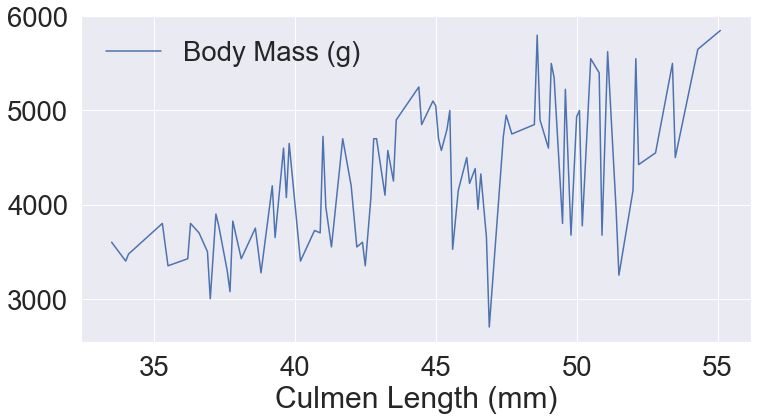

In [107]:
df_train[['Culmen Length (mm)', 'Body Mass (g)']].groupby(['Culmen Length (mm)'], as_index=True).mean().plot(figsize=(12,6))

- 부리의 가로 길이가 길수록 뚜렷하게 몸무게가 증가한다고 말할 수는 없지만, 어느정도 증가하는 경향을 가지고 있으므로 변수로 사용하는것이 좋을것 같습니다.

## Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이

In [108]:
df_train[['Culmen Depth (mm)', 'Body Mass (g)']].groupby(['Culmen Depth (mm)'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Culmen Depth (mm),
16.3,6000.000000
15.3,5550.000000
15.8,5500.000000
15.2,5475.000000
15.9,5450.000000
15.7,5400.000000
14.8,5200.000000
16.0,5106.250000
13.3,5100.000000


<AxesSubplot:xlabel='Culmen Depth (mm)'>

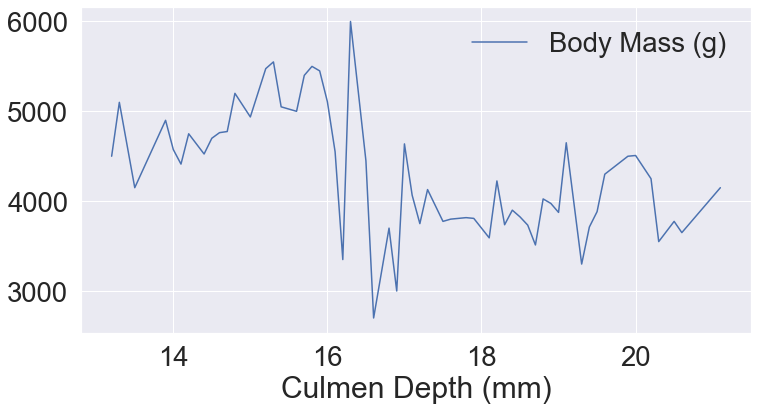

In [109]:
df_train[['Culmen Depth (mm)', 'Body Mass (g)']].groupby(['Culmen Depth (mm)'], as_index=True).mean().plot(figsize=(12,6))

- 부리의 세로 길이는 뚜렷한 선형의 관계를 가지고 있지 않다.

## Flipper Length (mm) : 펭귄의 팔(날개) 길이

In [110]:
df_train[['Flipper Length (mm)', 'Body Mass (g)']].groupby(['Flipper Length (mm)'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Flipper Length (mm),
230,5733.333333
231,5650.000000
221,5650.000000
222,5550.000000
228,5500.000000
224,5350.000000
225,5316.666667
220,5260.000000
226,5200.000000


<AxesSubplot:xlabel='Flipper Length (mm)'>

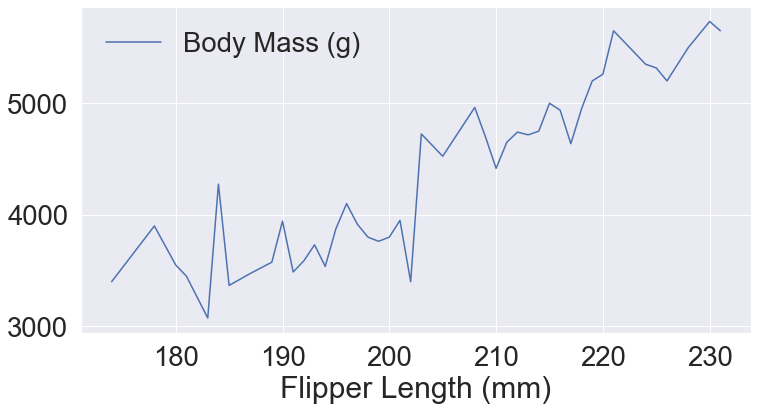

In [111]:
df_train[['Flipper Length (mm)', 'Body Mass (g)']].groupby(['Flipper Length (mm)'], as_index=True).mean().plot(figsize=(12,6))

- 팔(날개) 길이 뚜렷한 양의 상관관계를 가지고 있는듯합니다. 모델을 돌릴 때 중요한 변수로 생각해야 할 것 같습니다.

## Sex : 펭귄의 성별

In [112]:
df_train[['Sex', 'Body Mass (g)']].groupby(['Sex'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Sex,
MALE,4659.821429
FEMALE,4000.909091


- 성별간의 몸무게 차이도 존재하는 것으로 보입니다. 결측치가 있기 때문에 재확인 필요합니다.

## Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율

In [113]:
df_train[['Delta 15 N (o/oo)', 'Body Mass (g)']].groupby(['Delta 15 N (o/oo)'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Delta 15 N (o/oo),
8.27376,6300
8.40327,6000
8.08354,5850
8.59640,5800
8.38324,5700
...,...
8.88098,3275
9.68950,3250
9.21510,3075


<AxesSubplot:xlabel='Delta 15 N (o/oo)'>

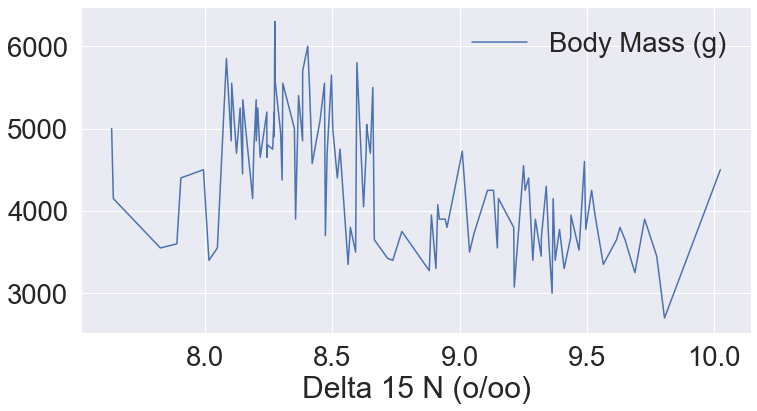

In [114]:
df_train[['Delta 15 N (o/oo)', 'Body Mass (g)']].groupby(['Delta 15 N (o/oo)'], as_index=True).mean().plot(figsize=(12, 6))

## Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율

In [115]:
df_train[['Delta 13 C (o/oo)', 'Body Mass (g)']].groupby(['Delta 13 C (o/oo)'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Delta 13 C (o/oo),
-25.00169,6300
-26.76821,6000
-26.18161,5850
-26.71199,5800
-26.84272,5700
...,...
-25.89741,3275
-24.43062,3250
-26.22530,3075


<AxesSubplot:xlabel='Delta 13 C (o/oo)'>

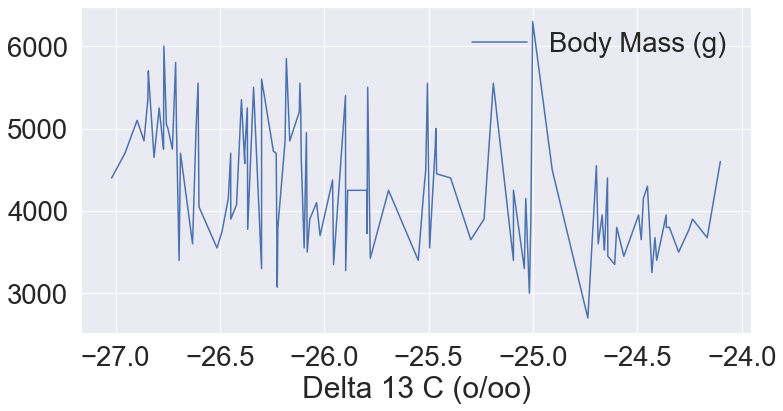

In [116]:
df_train[['Delta 13 C (o/oo)', 'Body Mass (g)']].groupby(['Delta 13 C (o/oo)'], as_index=True).mean().plot(figsize=(12,6))

- 토양과 먹이에 따라 변화하는 안정 동위원소 비율 모두 별다른 특징을 가지고 있지 않는것으로 보입니다.
- 하지만, 결측치가 존재하고 있으므로 결측치를 해결하고 다시 확인해야할 것 같습니다.

# Feature engineering

In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


- Species, Island,Clutch Completion, Sex를 str로 변환시켜 줍니다.

## Change Species

In [118]:
df_train['Species'].value_counts()

Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64

In [119]:
df_train['Species'].replace(['Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'],[0,1,2],inplace=True)
df_test['Species'].replace(['Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'],[0,1,2],inplace=True)

## Change Island

In [120]:
df_train['Island'].value_counts()

Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64

In [121]:
df_train['Island'].replace(['Biscoe','Dream', 'Torgersen'],[0,1,2],inplace=True)
df_test['Island'].replace(['Biscoe','Dream', 'Torgersen'],[0,1,2],inplace=True)

## Change Clutch Completion

In [122]:
df_train['Clutch Completion'].value_counts()

Yes    102
No      12
Name: Clutch Completion, dtype: int64

In [123]:
df_train['Clutch Completion'].replace(['No','Yes'],[0,1],inplace=True)
df_test['Clutch Completion'].replace(['No','Yes'],[0,1],inplace=True)

## Change Sex

In [124]:
df_train['Sex'].value_counts()

MALE      56
FEMALE    55
Name: Sex, dtype: int64

In [125]:
df_train['Sex'].replace(['MALE','FEMALE'],[0,1],inplace=True)
df_test['Sex'].replace(['MALE','FEMALE'],[0,1],inplace=True)

In [126]:
df_train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,0,0,1,50.0,15.3,220,0.0,8.30515,-25.19017,5550
1,1,1,1,0,49.5,19.0,200,0.0,9.63074,-24.34684,3800
2,2,0,0,1,45.1,14.4,210,1.0,8.51951,-27.01854,4400
3,3,0,0,1,44.5,14.7,214,1.0,8.20106,-26.16524,4850
4,4,0,0,0,49.6,16.0,225,0.0,8.38324,-26.84272,5700


## Heat map

- 우리는 여러 feature 를 가지고 있으니 이를 하나의 maxtrix 형태로 보면 편할 텐데, 이를 heatmap plot 이라고 하며, dataframe 의 corr() 메소드와 seaborn 을 가지고 편하게 그릴 수 있습니다.

<AxesSubplot:title={'center':'Penguin Correlation of Features'}>

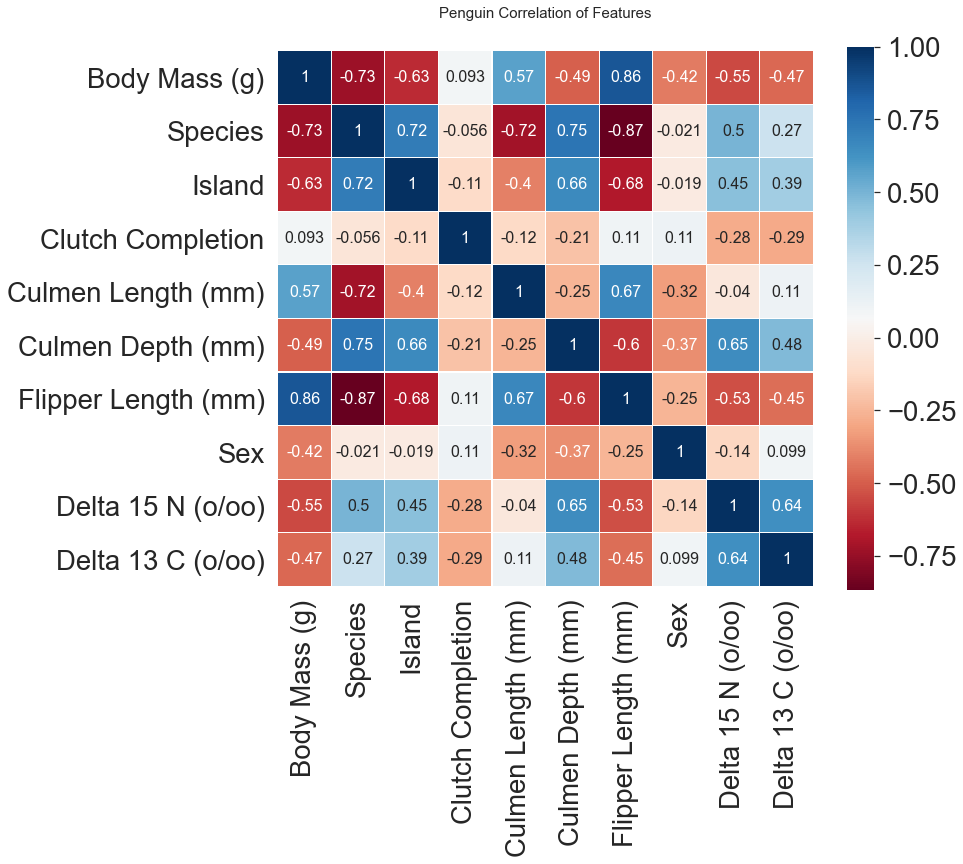

In [127]:
heatmap_data = df_train[['Body Mass (g)','Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)','Delta 13 C (o/oo)']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(12, 10))
plt.title('Penguin Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})


- EDA에서 살펴봤듯이 Body Mass와  Clutch Completion에 상관관계가 약한 것을 알수있습니다.
- 모델을 세울때 제거해도 될것같습니다.

## Fill Null

- 1.1에서 train,test데이터 둘다 Sex, Delta 15 N, Delta 13 C 에서 Null값이 있는것을 확인할 수 있습니다.
- test데이터에는 Body Mass에 대한 데이터는 없습니다.

### Fill Null in Sex

In [128]:
df_train['Body Mass (g)'].mean()

4327.850877192983

In [129]:
df_train.loc[(df_train.Sex.isnull())&(df_train['Body Mass (g)'] > 4330),'Sex'] = 0
df_train.loc[(df_train.Sex.isnull())&(df_train['Body Mass (g)'] <= 4330),'Sex'] = 1

- Test set에는 Body Mass에 대한 데이터가 없기 때문에 Flipper Length의 값에 따라서 비어있는 데이터를 채워줍니다.

In [130]:
df_train['Flipper Length (mm)'].mean()

203.05263157894737

In [131]:
df_test.loc[(df_test.Sex.isnull())&(df_test['Flipper Length (mm)'] > 205),'Sex'] = 0
df_test.loc[(df_test.Sex.isnull())&(df_test['Flipper Length (mm)'] <= 205),'Sex'] = 1

### Fill Null in Delta 15 N (o/oo)

In [132]:
df_train['Delta 15 N (o/oo)'].mean()

8.73763414414414

In [133]:
df_test['Delta 15 N (o/oo)'].mean()

8.731226347031962

In [134]:
df_train.loc[(df_train['Delta 15 N (o/oo)'].isnull()),'Delta 15 N (o/oo)'] = 8.73763414414414
df_test.loc[(df_test['Delta 15 N (o/oo)'].isnull()),'Delta 15 N (o/oo)'] = 8.731226347031962

### Fill Null in Delta 13 C (o/oo)

In [135]:
df_train['Delta 13 C (o/oo)'].mean()

-25.723051081081067

In [136]:
df_test['Delta 13 C (o/oo)'].mean()

-25.667744681818192

In [137]:
df_train.loc[(df_train['Delta 13 C (o/oo)'].isnull()),'Delta 13 C (o/oo)'] = -25.723051081081067
df_test.loc[(df_test['Delta 13 C (o/oo)'].isnull()),'Delta 13 C (o/oo)'] = -25.667744681818192

- 결측치가 잘 처리 되었는지 확인해봅시다.

In [138]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 
* (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column :         id	 Percent of NaN value: 0.00%
column :    Species	 Percent of NaN value: 0.00%
column :     Island	 Percent of NaN value: 0.00%
column : Clutch Completion	 Percent of NaN value: 0.00%
column : Culmen Length (mm)	 Percent of NaN value: 0.00%
column : Culmen Depth (mm)	 Percent of NaN value: 0.00%
column : Flipper Length (mm)	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column : Delta 15 N (o/oo)	 Percent of NaN value: 0.00%
column : Delta 13 C (o/oo)	 Percent of NaN value: 0.00%
column : Body Mass (g)	 Percent of NaN value: 0.00%


In [139]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 
* (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column :         id	 Percent of NaN value: 0.00%
column :    Species	 Percent of NaN value: 0.00%
column :     Island	 Percent of NaN value: 0.00%
column : Clutch Completion	 Percent of NaN value: 0.00%
column : Culmen Length (mm)	 Percent of NaN value: 0.00%
column : Culmen Depth (mm)	 Percent of NaN value: 0.00%
column : Flipper Length (mm)	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column : Delta 15 N (o/oo)	 Percent of NaN value: 0.00%
column : Delta 13 C (o/oo)	 Percent of NaN value: 0.00%


In [140]:
df_train

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,0,0,1,50.0,15.3,220,0.0,8.305150,-25.190170,5550
1,1,1,1,0,49.5,19.0,200,0.0,9.630740,-24.346840,3800
2,2,0,0,1,45.1,14.4,210,1.0,8.519510,-27.018540,4400
3,3,0,0,1,44.5,14.7,214,1.0,8.201060,-26.165240,4850
4,4,0,0,0,49.6,16.0,225,0.0,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...,...
109,109,2,2,1,36.6,17.8,185,1.0,8.737634,-25.723051,3700
110,110,2,1,1,39.2,18.6,190,0.0,9.110060,-25.795490,4250
111,111,2,1,1,43.2,18.5,192,0.0,8.970250,-26.036790,4100
112,112,1,1,0,46.9,16.6,192,1.0,9.805890,-24.737350,2700


## One-hot encoding on Species and Island

- 수치화시킨 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.

In [141]:
df_train = pd.get_dummies(df_train, columns=['Species'], prefix='Species')
df_test = pd.get_dummies(df_test, columns=['Species'], prefix='Species')

In [142]:
df_train = pd.get_dummies(df_train, columns=['Island'], prefix='Island')
df_test = pd.get_dummies(df_test, columns=['Island'], prefix='Island')

In [143]:
df_train.head()

,id,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_0,Species_1,Species_2,Island_0,Island_1,Island_2
0,0,1,50.0,15.3,220,0.0,8.30515,-25.19017,5550,1,0,0,1,0,0
1,1,0,49.5,19.0,200,0.0,9.63074,-24.34684,3800,0,1,0,0,1,0
2,2,1,45.1,14.4,210,1.0,8.51951,-27.01854,4400,1,0,0,1,0,0
3,3,1,44.5,14.7,214,1.0,8.20106,-26.16524,4850,1,0,0,1,0,0
4,4,0,49.6,16.0,225,0.0,8.38324,-26.84272,5700,1,0,0,1,0,0


## Drop columns

- 필요한 columns만 남기고 다 지웁시다.

In [144]:
df_train.drop(['id' ,'Clutch Completion'], axis=1, inplace=True)
df_test.drop(['id' ,'Clutch Completion'], axis=1, inplace=True)

In [145]:
df_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_0,Species_1,Species_2,Island_0,Island_1,Island_2
0,50.0,15.3,220,0.0,8.30515,-25.19017,5550,1,0,0,1,0,0
1,49.5,19.0,200,0.0,9.63074,-24.34684,3800,0,1,0,0,1,0
2,45.1,14.4,210,1.0,8.51951,-27.01854,4400,1,0,0,1,0,0
3,44.5,14.7,214,1.0,8.20106,-26.16524,4850,1,0,0,1,0,0
4,49.6,16.0,225,0.0,8.38324,-26.84272,5700,1,0,0,1,0,0


In [146]:
df_test.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species_0,Species_1,Species_2,Island_0,Island_1,Island_2
0,52.0,20.7,210.0,0.0,9.43146,-24.68440,0,1,0,0,1,0
1,55.9,17.0,228.0,0.0,8.31180,-26.35425,1,0,0,1,0,0
2,38.9,18.8,190.0,1.0,8.36936,-26.11199,0,0,1,0,1,0
3,45.2,16.6,191.0,1.0,9.62357,-24.78984,0,1,0,0,1,0
4,37.9,18.6,172.0,1.0,8.38404,-25.19837,0,0,1,1,0,0


#  Building machine learning model and prediction using the trained model

## Preparation - Split dataset into train, valid, test set

In [147]:
X_train = df_train.drop('Body Mass (g)', axis=1).values
target_label = df_train['Body Mass (g)'].values
X_test = df_test.values

## Model generation and prediction

In [148]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_train, target_label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : 331.1425
alpha 값  0.1 일때 평균 rmse : 330.3049
alpha 값  1 일때 평균 rmse : 327.6708
alpha 값  10 일때 평균 rmse : 338.8514
alpha 값  100 일때 평균 rmse : 370.7757


In [149]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train, target_label)
sample_submission['Body Mass (g)'] = ridge.predict(X_test)

sample_submission.to_csv('Penguin_final_2.csv',index=False)

- 앞서 교차검증에서 나온 최적 알파 값이 1이기 때문에 이를 대입해서 모델을 만듭니다.

- 이 모델의 MSE 값은 292.5517가 나왔습니다.

## Feature importance

In [152]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

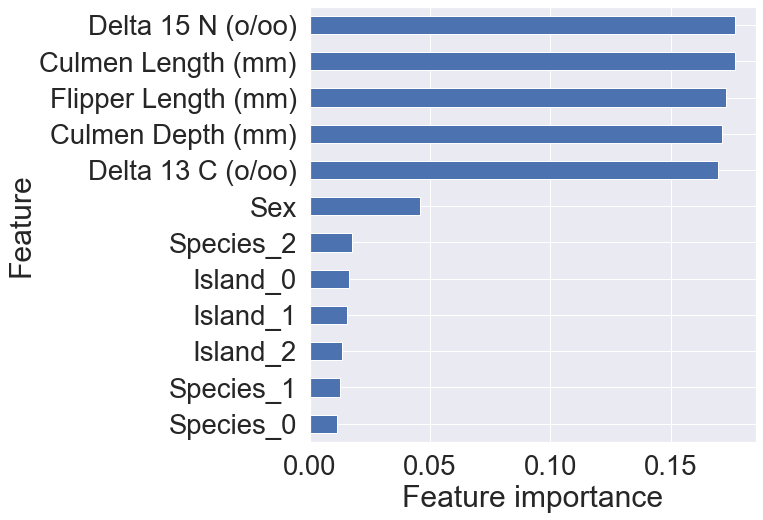

In [153]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- 우리가 얻은 모델에서는 Delta 15 N (o/oo) 가 가장 큰 영향력을 가집니다.

- 사실 feature importance 는 지금 모델에서의 importance 를 나타냅니다. 만약 다른 모델을 사용하게 된다면 feature importance 가 다르게 나올 수 있습니다.

- 이 feature importance 를 보고 실제로 Fare 가 중요한 feature 일 수 있다고 판단을 내릴 수는 있지만, 이것은 결국 모델에 귀속되는 하나의 결론이므로 통계적으로 좀 더 살펴보긴 해야합니다.